In [1]:
%matplotlib notebook

In [2]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#read CSV File
zev_sales_csv = pd.read_csv("Resources/ZEV_Sales_CSV.csv").set_index('Data Year')
median_income_county = pd.read_csv('Resources/2020_Median_Income_Per_County.csv')

In [4]:
# 2020- 2023 sales
recent_zev_sales = pd.DataFrame(zev_sales_csv.loc[[2019,2020,2021,2022,2023],:])
recent_zev_sales.head()

,County,FUEL_TYPE,MAKE,MODEL,Number of Vehicles
Data Year,,,,,
2019,Alameda,Electric,Audi,e-tron,74
2019,Alameda,Electric,BMW,i3,112
2019,Alameda,Electric,Chevrolet,Bolt EV,1047
2019,Alameda,Electric,FIAT,500e,31
2019,Alameda,Electric,Ford,Focus,2


In [156]:
zev_sales_csv_county = pd.DataFrame(recent_zev_sales.groupby("County")["Number of Vehicles"].sum().sort_values(ascending=False))
print(zev_sales_csv_county.head(5))
print(zev_sales_csv_county.tail(5))

             Number of Vehicles
County                         
Los Angeles              276524
Orange                   128893
Santa Clara               99703
San Diego                 85388
Alameda                   65017
         Number of Vehicles
County                     
Trinity                  38
Lassen                   33
Alpine                   29
Sierra                   10
Modoc                     5


In [217]:
zev_sales_csv_large = pd.DataFrame(zev_sales_csv_county[zev_sales_csv_county['Number of Vehicles']> 7000]).dropna(how='all')
zev_sales_csv_large

,Number of Vehicles
County,
Los Angeles,276524
Orange,128893
Santa Clara,99703
San Diego,85388
Alameda,65017
Riverside,41204
San Mateo,40646
Contra Costa,37788
San Bernardino,32175


In [218]:
zev_sales_csv_small = zev_sales_csv_county[zev_sales_csv_county['Number of Vehicles']< 7000].dropna(how='all')
Other = zev_sales_csv_small.sum()
Other

Number of Vehicles    53428
dtype: int64

In [219]:
Other_df = pd.DataFrame({'Number of Vehicles': 53428},index=['Other'])
Other_df.index.rename('County', inplace=True)
Other_df

,Number of Vehicles
County,
Other,53428


In [221]:
zev_sales_chart_data = pd.concat([zev_sales_csv_large,Other_df])
zev_sales_chart_data

,Number of Vehicles
County,
Los Angeles,276524
Orange,128893
Santa Clara,99703
San Diego,85388
Alameda,65017
Riverside,41204
San Mateo,40646
Contra Costa,37788
San Bernardino,32175


In [162]:
 [ c for c in zev_sales_csv_county.index if  > 7000) else "Too Small"]

SyntaxError: invalid syntax (2406894368.py, line 1)

In [63]:
zev_sales_csv_county = pd.DataFrame(recent_zev_sales.groupby(["County","MAKE","MODEL"])["Number of Vehicles"].sum().sort_values(ascending=False).reset_index().set_index("County"))
print(zev_sales_csv_county.head(10))
print(zev_sales_csv_county.tail(5))

              MAKE    MODEL  Number of Vehicles
County                                         
Los Angeles  Tesla  Model 3               65306
Los Angeles  Tesla  Model Y               53644
Orange       Tesla  Model Y               29122
Orange       Tesla  Model 3               27624
Santa Clara  Tesla  Model Y               22081
Santa Clara  Tesla  Model 3               21721
San Diego    Tesla  Model 3               19693
San Diego    Tesla  Model Y               16926
Alameda      Tesla  Model Y               14752
Alameda      Tesla  Model 3               13201
             MAKE          MODEL  Number of Vehicles
County                                              
Stanislaus  Volvo  XC40 Recharge                   1
Stanislaus  Volvo           XC60                   1
Stanislaus  Volvo  XC60 Recharge                   1
Shasta      Lucid            Air                   1
Yuba        Volvo           XC90                   1


In [65]:
zev_sales_csv_county = pd.DataFrame(recent_zev_sales.groupby(["County","FUEL_TYPE"])["Number of Vehicles"].sum().sort_values(ascending=False).reset_index().set_index("County"))
print(zev_sales_csv_county.head(20))
print(zev_sales_csv_county.tail(5))

               FUEL_TYPE  Number of Vehicles
County                                      
Los Angeles     Electric              181754
Orange          Electric               86450
Santa Clara     Electric               65979
San Diego       Electric               58821
Los Angeles         PHEV               53951
Alameda         Electric               43325
San Mateo       Electric               29231
Riverside       Electric               28228
Contra Costa    Electric               25602
Orange              PHEV               21676
San Bernardino  Electric               21651
San Francisco   Electric               17518
Sacramento      Electric               17137
San Diego           PHEV               15084
Ventura         Electric               14467
Santa Clara         PHEV               12921
Alameda             PHEV                9445
San Joaquin     Electric                8919
Marin           Electric                8749
Riverside           PHEV                8063
         F

<IPython.core.display.Javascript object>


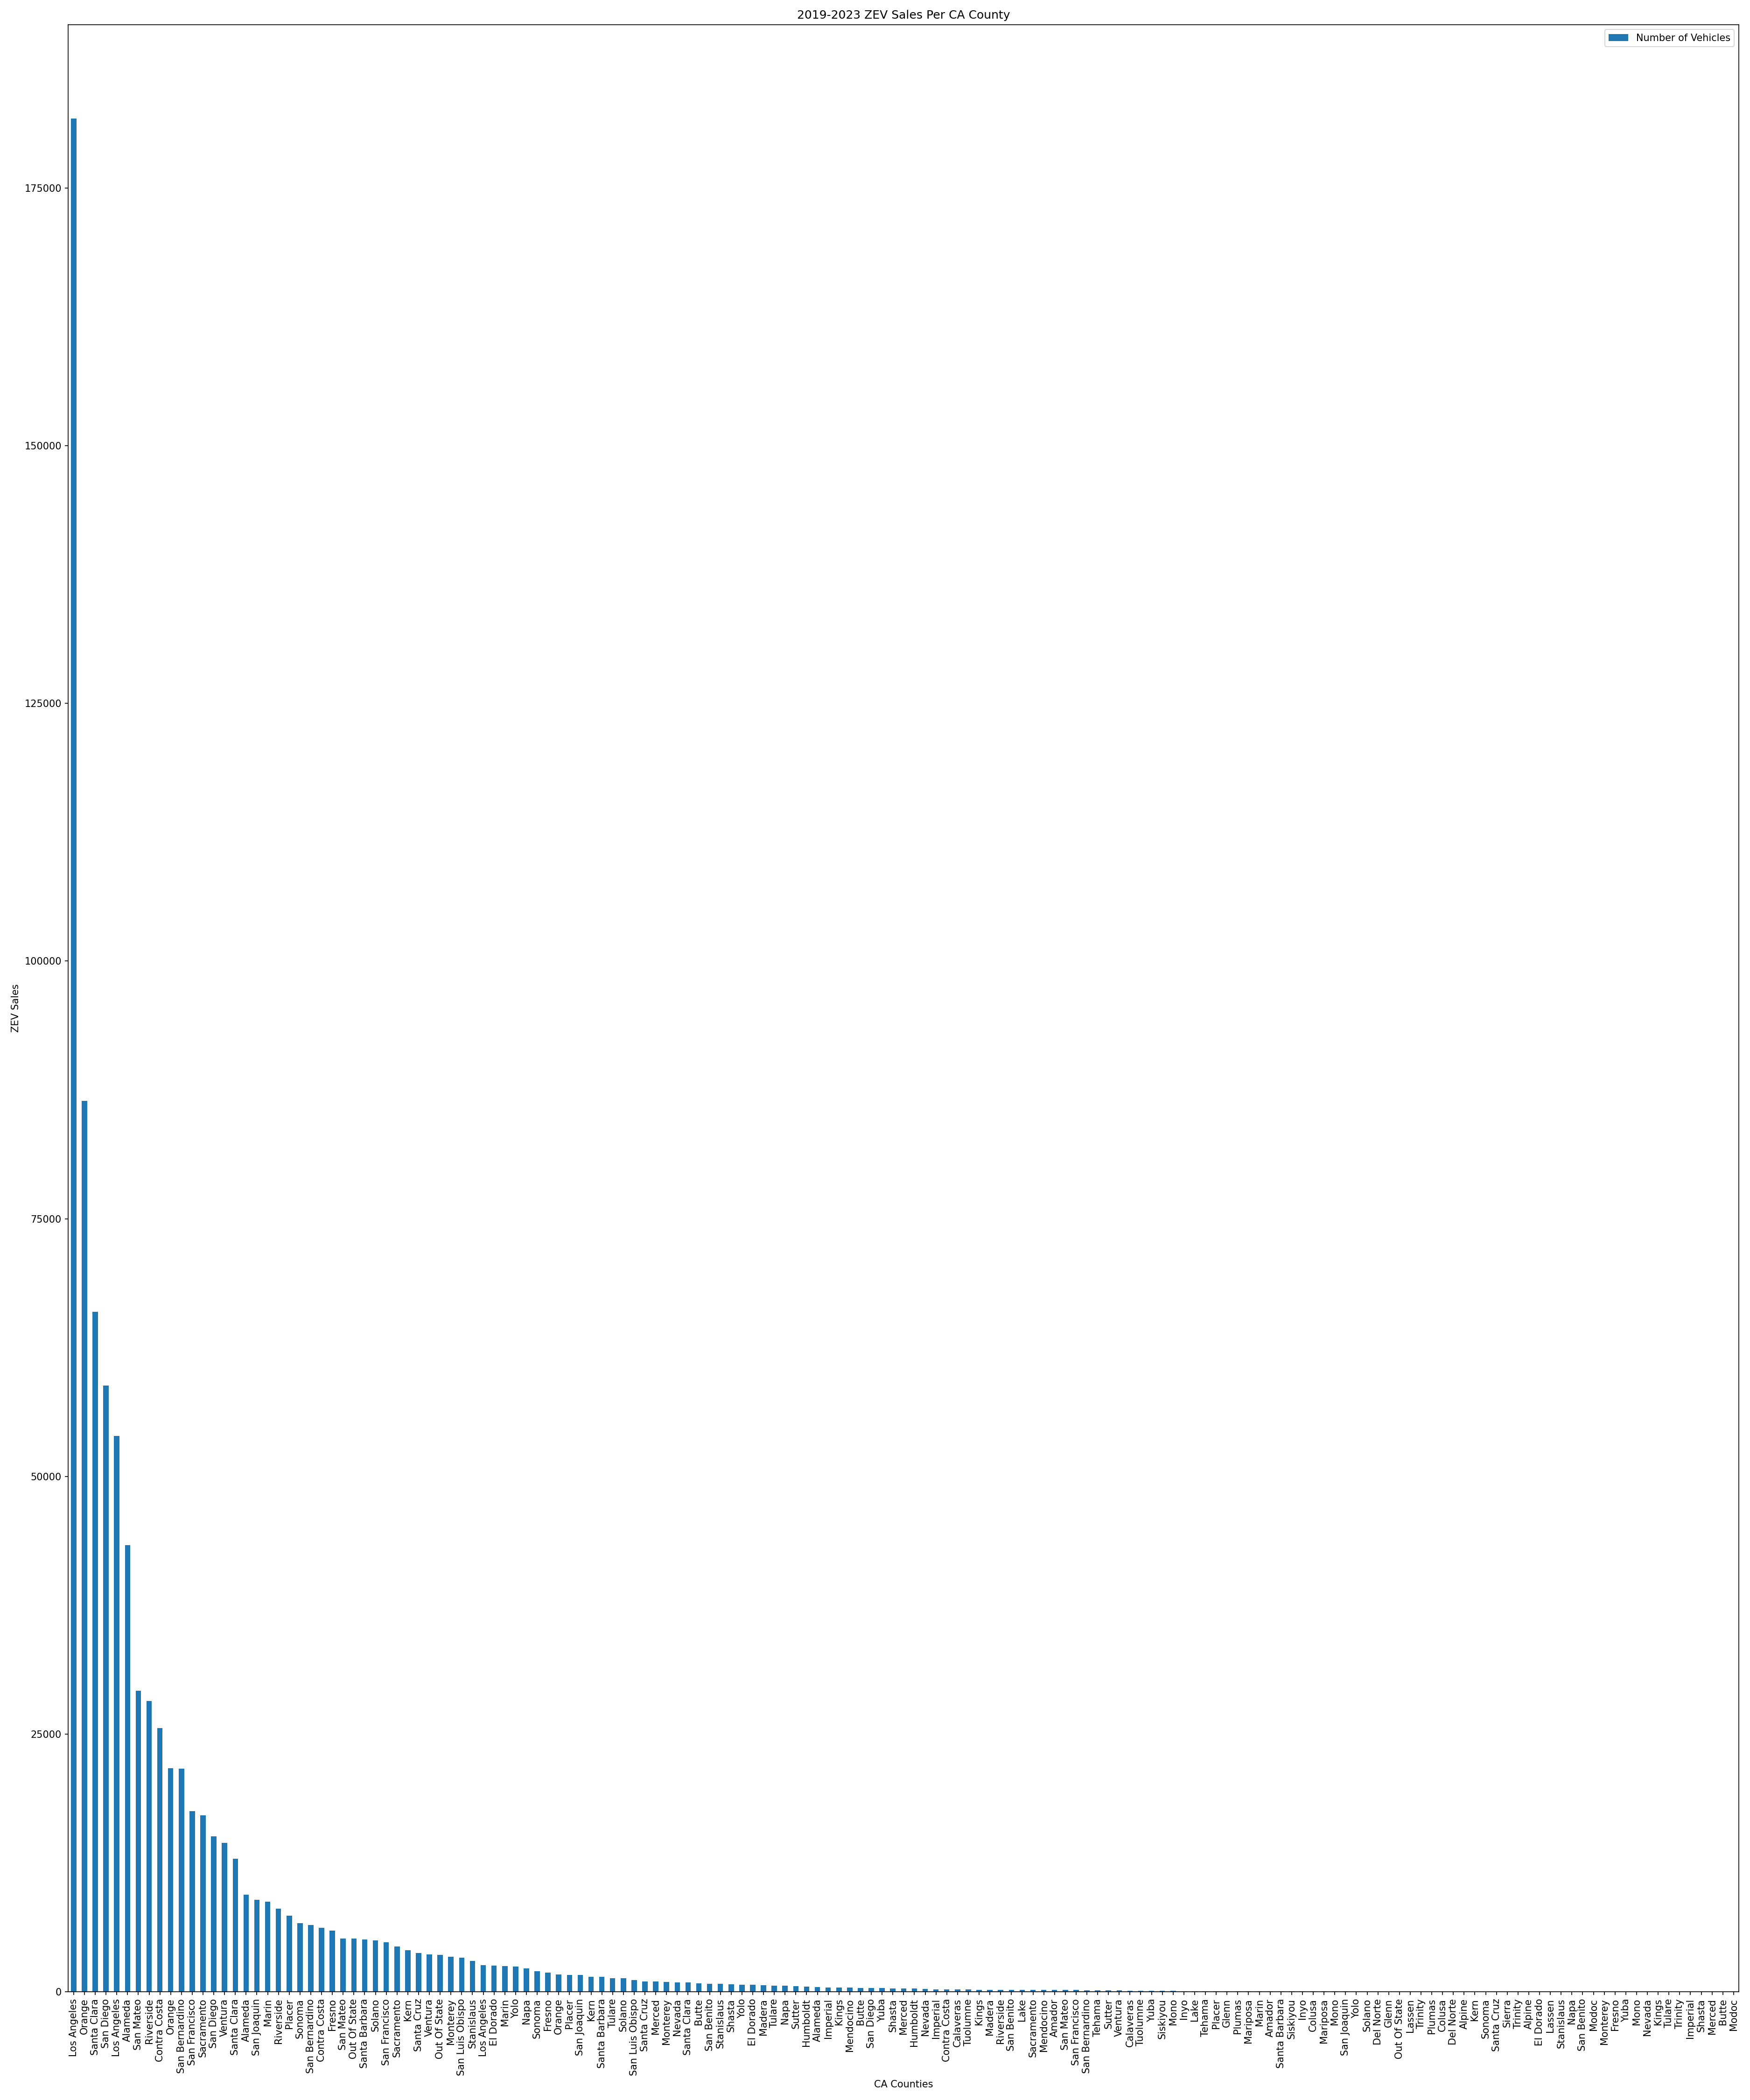

In [82]:
# Create a bar chart based off 2019-2023 Sales
zev_sales_csv_county.plot(kind="bar",figsize=(25,30))

# Set the xlabel and ylabel 
plt.xlabel("CA Counties")
plt.ylabel("ZEV Sales")
plt.title("2019-2023 ZEV Sales Per CA County")

#Show Graph
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


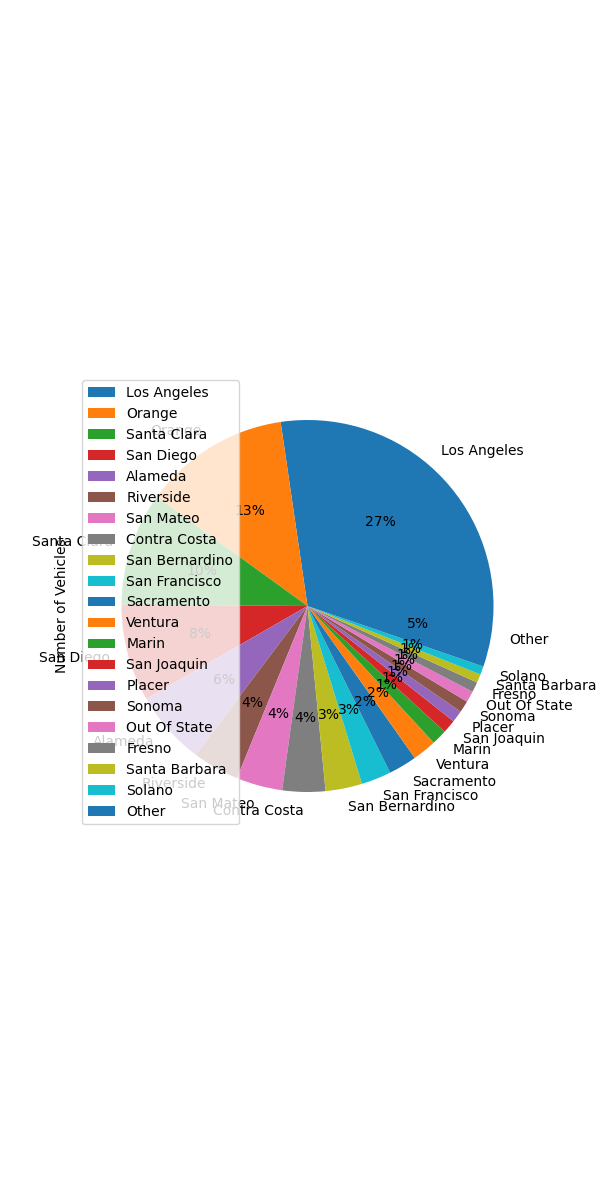

<Axes: ylabel='Number of Vehicles'>

In [227]:
# Create a bar chart based off 2019-2023 Sales
plot = zev_sales_chart_data.plot.pie(y="Number of Vehicles",figsize=(6,12), autopct='%1.0f%%')
plot

In [16]:
median_income_county = median_income_county.dropna(how='any').rename(columns={'Unnamed: 1':"County",'Unnamed: 2':"Median Income"}).sort_values("Median Income",ascending=False)
print(median_income_county.head(5))
print(median_income_county.tail(5))

   TABLE B-6.1           County Median Income
8            1      Santa Clara       $69,431
9            2            Marin       $67,925
10           3        San Mateo       $67,870
11           4    San Francisco       $66,004
12           5          Alameda       $59,976
   TABLE B-6.1      County Median Income
61          54      Madera       $31,609
62          55        Kern       $31,594
63          56      Alpine       $31,360
64          57      Tulare       $30,151
65          58    Imperial       $25,451
